<a href="https://colab.research.google.com/github/julihxcortiz/estudiantes-gui/blob/main/client1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [285]:
# Proyecto data set multinacional cobranza
""" 1. Definicion del problema
Tenemos un data set de una multinacional que ofrece un servicio
o vende un producto con una dinamica crediticia. El objetivo es
entender los patrones de credito, identificar riesgos y clientes importantes
     2. Preguntas a resolver
¿cuales son los clientes que solicitan mas credito?
¿cuales son los puntajes de credito mas bajos y mas altos?
¿Hay patrones estacionales o tendencias en el credito?"""

' 1. Definicion del problema\nTenemos un data set de una multinacional que ofrece un servicio\no vende un producto con una dinamica crediticia. El objetivo es\nentender los patrones de credito, identificar riesgos y clientes importantes\n     2. Preguntas a resolver\n¿cuales son los clientes que solicitan mas credito?\n¿cuales son los puntajes de credito mas bajos y mas altos?\n¿Hay patrones estacionales o tendencias en el credito?'

In [286]:
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# cargar dataset
path = '/infoclient.csv'

# Leer dataset
df =pd.read_csv(path)



In [287]:
# Ver informacion de las columnas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

In [288]:
# Realizar visualizacion Dataframe

df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400


In [289]:
# Medidas estadisticas de columnas

df.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


In [290]:
# Visualizar duplicados

df.duplicated().sum()

np.int64(0)

In [291]:
# Visualizar nulos

df.isnull().sum()

,0
CUSTOMER_ORDER_ID,0
SALES_ORG,0
DISTRIBUTION_CHANNEL,0
DIVISION,0
RELEASED_CREDIT_VALUE,0
PURCHASE_ORDER_TYPE,18692
COMPANY_CODE,0
ORDER_CREATION_DATE,0
ORDER_CREATION_TIME,0
CREDIT_CONTROL_AREA,0


In [292]:
# Copiar Dataframe

data_cleaned = df

In [293]:
# Hallar la media de los campos nan en'CREDIT_STATUS' con respecto a su 'COMPANY_CODE'

data_cleaned['CREDIT_STATUS'] = data_cleaned.groupby('COMPANY_CODE')['CREDIT_STATUS'].transform(
    lambda x: x.fillna(x.mean())
)

In [294]:
# Visualizar decimales 'CREDIT_STATUS

data_cleaned['CREDIT_STATUS'].head(1)

,CREDIT_STATUS
0,84.609929


In [295]:
# Redondear 'CREDIT_STATUS' a 2 decimales

data_cleaned['CREDIT_STATUS'] = data_cleaned['CREDIT_STATUS'].round(2)


In [296]:
# Totalizar los campos nan en 'CREDIT_STATUS'

data_cleaned['CREDIT_STATUS'].isna().sum()

np.int64(0)

In [297]:
# Reemplazar , por . en la columna 'RELEASED_CREDIT_VALUE' tipo string

data_cleaned['RELEASED_CREDIT_VALUE'] = (
    data_cleaned['RELEASED_CREDIT_VALUE']
    .astype(str)
    .str.replace(',', '.')
)

# Revisar numéricos

mask_numeric = data_cleaned['RELEASED_CREDIT_VALUE'].str.replace('.', '', 1).str.isdigit()
data_cleaned = data_cleaned.loc[mask_numeric].copy()

# A float

data_cleaned['RELEASED_CREDIT_VALUE'] = data_cleaned['RELEASED_CREDIT_VALUE'].astype(float)



In [298]:
# Ver tipo

data_cleaned['RELEASED_CREDIT_VALUE'].dtype

dtype('float64')

In [299]:
# Ver 5 primeros

print(data_cleaned[['RELEASED_CREDIT_VALUE']].head())

   RELEASED_CREDIT_VALUE
0                   0.00
1                   0.00
2               82342.02
3                1471.24
4                   0.00


In [300]:
# Ver tipo

data_cleaned['ORDER_CREATION_DATE'].dtype

dtype('int64')

In [301]:
# A datetime

data_cleaned['ORDER_CREATION_DATE'] = pd.to_datetime(
    data_cleaned['ORDER_CREATION_DATE'].astype(str),
    format='%Y%m%d')


In [302]:
# Ver uno

data_cleaned['ORDER_CREATION_DATE'].head(1)

,ORDER_CREATION_DATE
0,2022-01-01


In [303]:
# Eliminar columna

data_cleaned= data_cleaned.drop(columns=['ORDER_CREATION_TIME'])

In [304]:
# Reemplazar , por . 'ORDER_AMOUNT'

data_cleaned['ORDER_AMOUNT'] = (
    data_cleaned['ORDER_AMOUNT']
    .astype(str)
    .str.replace(',', '.')
)

# Numericos

mask_numeric = data_cleaned['ORDER_AMOUNT'].str.replace('.', '', 1).str.isdigit()
data_cleaned = data_cleaned.loc[mask_numeric].copy()

# A float

data_cleaned['ORDER_AMOUNT'] = data_cleaned['ORDER_AMOUNT'].astype(float)

In [305]:
# A datetime

data_cleaned['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(
    data_cleaned['REQUESTED_DELIVERY_DATE'].astype(str),
    format='%Y%m%d'
)


In [306]:
# Verificar

data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1101892 entries, 0 to 1101924
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   CUSTOMER_ORDER_ID        1101892 non-null  int64         
 1   SALES_ORG                1101892 non-null  int64         
 2   DISTRIBUTION_CHANNEL     1101892 non-null  object        
 3   DIVISION                 1101892 non-null  object        
 4   RELEASED_CREDIT_VALUE    1101892 non-null  float64       
 5   PURCHASE_ORDER_TYPE      1083203 non-null  object        
 6   COMPANY_CODE             1101892 non-null  int64         
 7   ORDER_CREATION_DATE      1101892 non-null  datetime64[ns]
 8   CREDIT_CONTROL_AREA      1101892 non-null  object        
 9   SOLD_TO_PARTY            1101892 non-null  int64         
 10  ORDER_AMOUNT             1101892 non-null  float64       
 11  REQUESTED_DELIVERY_DATE  1101892 non-null  datetime64[ns]
 12  ORDER

In [307]:
# Creación columna

data_cleaned['TOTALVALUE'] = data_cleaned['ORDER_AMOUNT'] + data_cleaned['RELEASED_CREDIT_VALUE']
data_cleaned.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,TOTALVALUE
0,946851639,3537,United States of America,South-Region,0.00,1000,3220,2022-01-01,SR02,756141537,954.61,2022-01-13,EUR,84.61,12311807,954.61
1,963432061,3449,Martinique,South-Region,0.00,1000,3220,2022-01-01,NR03,798847812,787.36,2022-01-11,EUR,84.61,12311807,787.36
2,971991639,3238,Moldova,South-Region,82342.02,I200,3260,2022-01-01,NR01,960984659,67493.46,2022-01-12,EUR,93.00,12118758,149835.48
3,754349803,3911,United Arab Emirates,South-Region,1471.24,N000,3290,2022-01-01,SR02,925857642,1405.54,2022-01-06,EUR,93.00,1210499770,2876.78
4,930253442,2381,Greece,South-Region,0.00,N000,3290,2022-01-01,SR01,947942786,0.00,2022-01-06,EUR,64.00,1210351400,0.00


In [308]:
# Desglozar la 'ORDER_CREATION_DATE' en columnas temporales

data_cleaned['YEAR'] = data_cleaned['ORDER_CREATION_DATE'].dt.year
data_cleaned['MONTH'] = data_cleaned['ORDER_CREATION_DATE'].dt.month
data_cleaned['SEMESTER'] = data_cleaned['MONTH'].apply(lambda x: 1 if x <= 6 else 2)
data_cleaned['QUARTER'] = data_cleaned['ORDER_CREATION_DATE'].dt.quarter

# Mostrar las nuevas columnas

data_cleaned.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,TOTALVALUE,YEAR,MONTH,SEMESTER,QUARTER
0,946851639,3537,United States of America,South-Region,0.00,1000,3220,2022-01-01,SR02,756141537,954.61,2022-01-13,EUR,84.61,12311807,954.61,2022,1,1,1
1,963432061,3449,Martinique,South-Region,0.00,1000,3220,2022-01-01,NR03,798847812,787.36,2022-01-11,EUR,84.61,12311807,787.36,2022,1,1,1
2,971991639,3238,Moldova,South-Region,82342.02,I200,3260,2022-01-01,NR01,960984659,67493.46,2022-01-12,EUR,93.00,12118758,149835.48,2022,1,1,1
3,754349803,3911,United Arab Emirates,South-Region,1471.24,N000,3290,2022-01-01,SR02,925857642,1405.54,2022-01-06,EUR,93.00,1210499770,2876.78,2022,1,1,1
4,930253442,2381,Greece,South-Region,0.00,N000,3290,2022-01-01,SR01,947942786,0.00,2022-01-06,EUR,64.00,1210351400,0.00,2022,1,1,1


In [309]:
# Agregar columna de valor total (credito + debito)

data_cleaned['TOTALVALUE'] = data_cleaned['ORDER_AMOUNT'] + data_cleaned['RELEASED_CREDIT_VALUE']
data_cleaned.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,TOTALVALUE,YEAR,MONTH,SEMESTER,QUARTER
0,946851639,3537,United States of America,South-Region,0.00,1000,3220,2022-01-01,SR02,756141537,954.61,2022-01-13,EUR,84.61,12311807,954.61,2022,1,1,1
1,963432061,3449,Martinique,South-Region,0.00,1000,3220,2022-01-01,NR03,798847812,787.36,2022-01-11,EUR,84.61,12311807,787.36,2022,1,1,1
2,971991639,3238,Moldova,South-Region,82342.02,I200,3260,2022-01-01,NR01,960984659,67493.46,2022-01-12,EUR,93.00,12118758,149835.48,2022,1,1,1
3,754349803,3911,United Arab Emirates,South-Region,1471.24,N000,3290,2022-01-01,SR02,925857642,1405.54,2022-01-06,EUR,93.00,1210499770,2876.78,2022,1,1,1
4,930253442,2381,Greece,South-Region,0.00,N000,3290,2022-01-01,SR01,947942786,0.00,2022-01-06,EUR,64.00,1210351400,0.00,2022,1,1,1


In [310]:
# Dataframe Global financiero

balance = data_cleaned[['TOTALVALUE', 'ORDER_AMOUNT', 'RELEASED_CREDIT_VALUE']].sum()
balance_formatted = balance.apply(lambda x: f"${x:,.2f}")
balance_formatted = balance_formatted.rename({
    'TOTALVALUE': 'VALOR TOTAL',
    'ORDER_AMOUNT': 'VALOR CONTADO',
    'RELEASED_CREDIT_VALUE': 'VALOR CREDITO'
})

balance_formatted = pd.DataFrame({
    'BALANCE': balance_formatted.index,
    'VALOR': balance_formatted.values
    })

balance_formatted

,BALANCE,VALOR
0,VALOR TOTAL,"$10,108,621,006.32"
1,VALOR CONTADO,"$6,115,963,314.98"
2,VALOR CREDITO,"$3,992,657,691.34"


In [311]:

# Resumen agrupado

resumen = (
    data_cleaned
    .assign(TIENE_CREDITO = data_cleaned['RELEASED_CREDIT_VALUE'] > 0)
    .groupby('TIENE_CREDITO')
    .size()
    .reset_index(name='NO CLIENTES POR DINAMICA DE PAGO')
)

# Mapear categorías y calcular %

resumen['DINAMICA DE PAGO'] = resumen['TIENE_CREDITO'].map({False: 'SIN CREDITO', True: 'CON CREDITO'})
resumen['% CLIENTES POR DINAMICA DE PAGO'] = (resumen['NO CLIENTES POR DINAMICA DE PAGO'] / len(data_cleaned) * 100).round(2)

# Crear fila de totales y concatenar

totales = pd.DataFrame({
    'DINAMICA DE PAGO': ['TOTAL'],
    'NO CLIENTES POR DINAMICA DE PAGO': [resumen['NO CLIENTES POR DINAMICA DE PAGO'].sum()],
    '% CLIENTES POR DINAMICA DE PAGO': [resumen['% CLIENTES POR DINAMICA DE PAGO'].sum()]
})

# Concatenar y dejar columnas finales

resumen_final = pd.concat([resumen[['DINAMICA DE PAGO','NO CLIENTES POR DINAMICA DE PAGO','% CLIENTES POR DINAMICA DE PAGO']], totales], ignore_index=True)

resumen_final


,DINAMICA DE PAGO,NO CLIENTES POR DINAMICA DE PAGO,% CLIENTES POR DINAMICA DE PAGO
0,SIN CREDITO,1025954,93.11
1,CON CREDITO,75938,6.89
2,TOTAL,1101892,100.00


In [312]:
# Agrupado

credit_by_credit_status = data_cleaned.groupby('CREDIT_STATUS')['RELEASED_CREDIT_VALUE'].sum()

# Filtrar solo valores positivos

credit_by_credit_status_positive = credit_by_credit_status[credit_by_credit_status > 0]

# Valor monetario

credit_by_credit_status_formatted = credit_by_credit_status_positive.apply(lambda x: f"${x:,.2f}")

# Crear dataframe

credit_by_credit_status_formatted = pd.DataFrame({
    'CREDIT_STATUS': credit_by_credit_status_formatted.index,
    'RELEASED_CREDIT_VALUE': credit_by_credit_status_formatted.values
})

# Renombrar encabezados

credit_by_credit_status_formatted = credit_by_credit_status_formatted.rename(
    columns={
        'CREDIT_STATUS': 'ESTATUS CREDITICIO',
        'RELEASED_CREDIT_VALUE': 'VALOR CREDITO'
        })

credit_by_credit_status_formatted


,ESTATUS CREDITICIO,VALOR CREDITO
0,52.0,"$24,979,915.58"
1,64.0,"$26,990,368.97"
2,93.0,"$3,940,687,406.79"


In [313]:
# Agrupado

credit_by_control_area = data_cleaned.groupby('CREDIT_CONTROL_AREA')['RELEASED_CREDIT_VALUE'].sum()

# Valor monetario

credit_by_control_area_formatted = credit_by_control_area.apply(lambda x: f"${x:,.2f}")

# Crear DataFrame

credit_by_control_area_formatted = pd.DataFrame({
    'CREDIT_CONTROL_AREA': credit_by_control_area_formatted.index,
    'RELEASED_CREDIT_VALUE': credit_by_control_area_formatted.values
})

# Renombrar encabezados

credit_by_control_area_formatted = credit_by_control_area_formatted.rename(
    columns={
        'CREDIT_CONTROL_AREA': 'AREA DE CONTROL',
        'RELEASED_CREDIT_VALUE': 'VALOR A MONITOREAR'
    }
)

credit_by_control_area_formatted

,AREA DE CONTROL,VALOR A MONITOREAR
0,NR01,"$543,588,861.48"
1,NR02,"$369,370,362.44"
2,NR03,"$647,355,848.48"
3,NR04,"$830,374,523.40"
4,SR01,"$376,901,225.20"
5,SR02,"$477,883,878.79"
6,SR03,"$427,703,766.71"
7,SR04,"$319,479,224.85"


In [314]:
# Agrupado

credit_by_semester = data_cleaned.groupby(['YEAR','SEMESTER'])['RELEASED_CREDIT_VALUE'].sum()

# Valor monetario

credit_by_semester_formatted = credit_by_semester.apply(lambda x: f"${x:,.2f}")

# crear dataframe

credit_by_semester_formatted = pd.DataFrame({
    'YEAR': credit_by_semester_formatted.index.get_level_values(0),
    'SEMESTER': credit_by_semester_formatted.index.get_level_values(1),
    'RELEASED_CREDIT_VALUE': credit_by_semester_formatted.values
})

# Configurar encabezados

credit_by_semester_formatted = credit_by_semester_formatted.rename(
    columns={
        'RELEASED_CREDIT_VALUE': 'VALOR CREDITO SEMESTRAL'
        })

credit_by_semester_formatted



,YEAR,SEMESTER,VALOR CREDITO SEMESTRAL
0,2022,1,"$3,992,657,691.34"


In [315]:
# Agrupado y Dataframe

credit_by_month = data_cleaned.groupby(['YEAR', 'MONTH'], as_index=False)['RELEASED_CREDIT_VALUE'].sum()
total_month = credit_by_month['RELEASED_CREDIT_VALUE'].sum()
fila_total_month  = pd.DataFrame({'YEAR':['TOTAL'], 'MONTH': [""], 'RELEASED_CREDIT_VALUE':[total_month]})
credit_summary_month = pd.concat([credit_by_month, fila_total_month], ignore_index = True)

# Valor monetario

credit_summary_month['RELEASED_CREDIT_VALUE'] = credit_summary_month['RELEASED_CREDIT_VALUE'].apply(lambda x: f"${x:,.2f}")

# Rename

credit_summary_month = credit_summary_month.rename(
    columns={
        'RELEASED_CREDIT_VALUE': 'VALOR CREDITO MENSUAL'
    })

credit_summary_month

,YEAR,MONTH,VALOR CREDITO MENSUAL
0,2022,1,"$681,399,828.67"
1,2022,2,"$797,479,027.92"
2,2022,3,"$908,699,627.99"
3,2022,4,"$720,423,438.39"
4,2022,5,"$863,989,801.56"
5,2022,6,"$20,665,966.81"
6,TOTAL,,"$3,992,657,691.34"


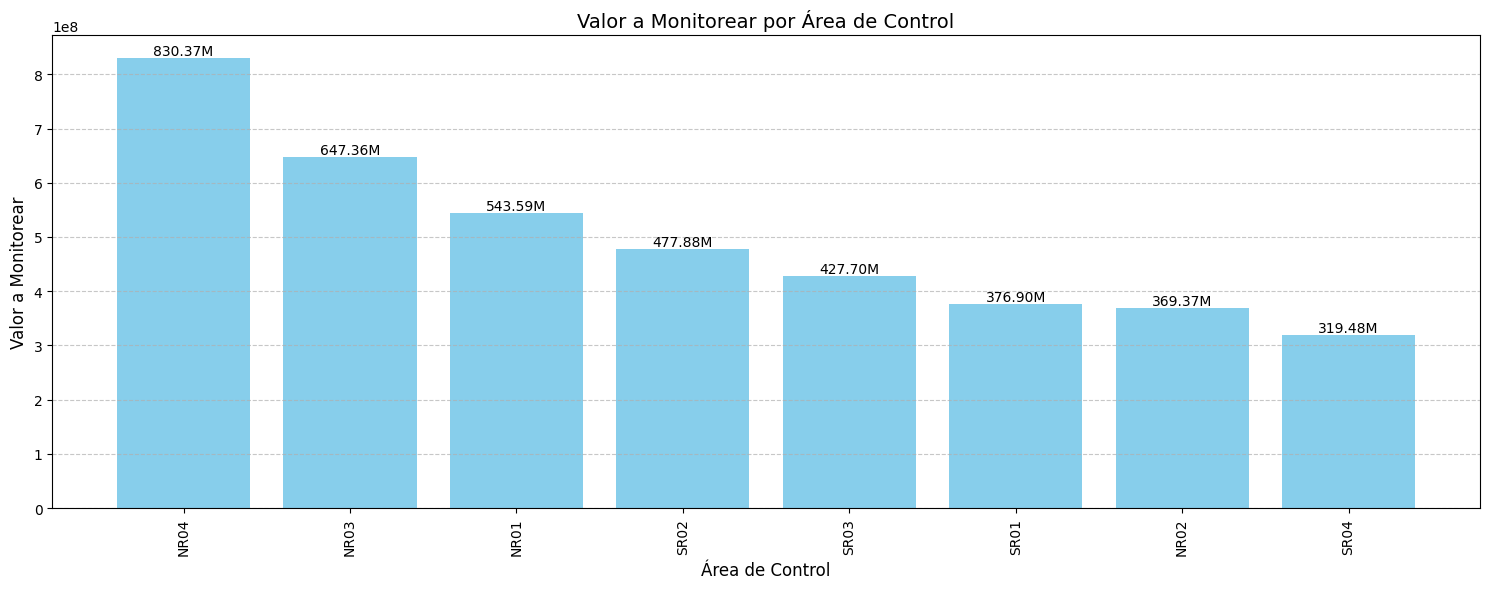

In [316]:
# Agrupar y ordenar

data_area = data_cleaned.groupby('CREDIT_CONTROL_AREA')['RELEASED_CREDIT_VALUE'].sum().reset_index()
data_area = data_area.sort_values(by='RELEASED_CREDIT_VALUE', ascending=False)

# Graficar

plt.figure(figsize=(15,6))
bars = plt.bar(data_area['CREDIT_CONTROL_AREA'], data_area['RELEASED_CREDIT_VALUE'], color='skyblue')

plt.xlabel('Área de Control', fontsize=12)
plt.ylabel('Valor a Monitorear', fontsize=12)
plt.title('Valor a Monitorear por Área de Control', fontsize=14)
plt.xticks(rotation=90)

# Etiquetas adaptativas

for bar in bars:
    height = bar.get_height()
    if height >= 1_000_000:
        label = f'{height/1_000_000:.2f}M'
    elif height >= 1_000:
        label = f'{height/1_000:.0f}K'
    else:
        label = f'{int(height)}'
    plt.text(bar.get_x() + bar.get_width()/2, height, label, ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


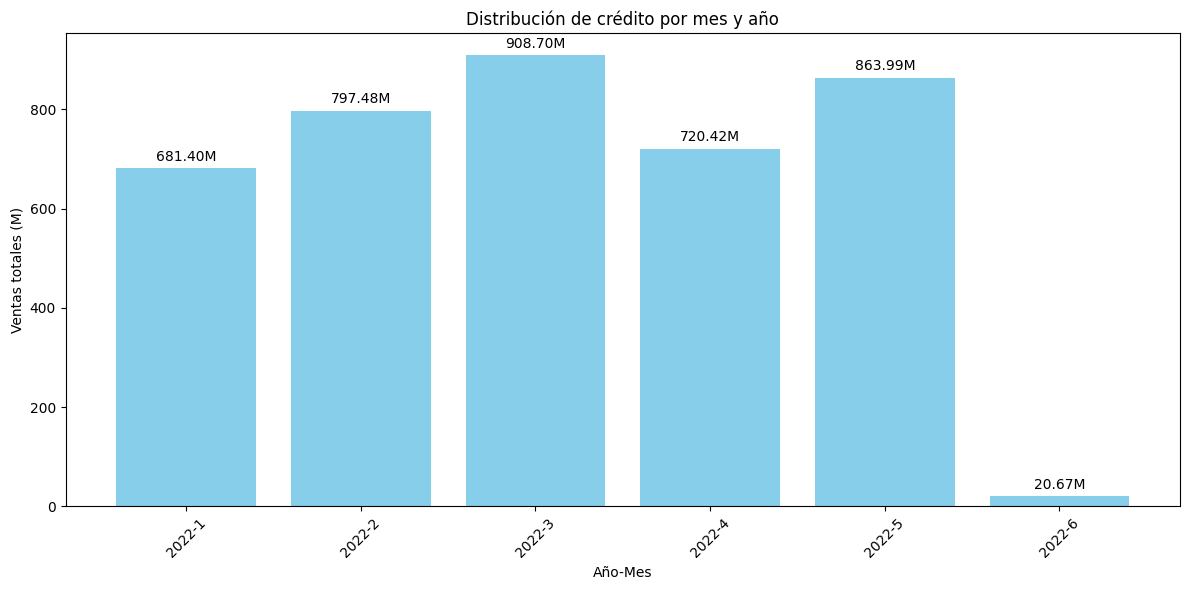

In [317]:
# Agrupar y resetear índice

monthly_credit = data_cleaned.groupby(['YEAR', 'MONTH'])['RELEASED_CREDIT_VALUE'].sum().reset_index()
monthly_credit['label'] = monthly_credit['YEAR'].astype(str) + '-' + monthly_credit['MONTH'].astype(str)

# Etiquetas adaptativas

max_val = monthly_credit['RELEASED_CREDIT_VALUE'].max()
if max_val > 1e12:
    scale = 1e12
    suffix = 'T'
elif max_val > 1e9:
    scale = 1e9
    suffix = 'B'
elif max_val > 1e6:
    scale = 1e6
    suffix = 'M'
else:
    scale = 1
    suffix = ''

# Valores escalados

monthly_credit['value_scaled'] = monthly_credit['RELEASED_CREDIT_VALUE'] / scale

# Gráfico de barras

plt.figure(figsize=(12,6))
plt.bar(monthly_credit['label'], monthly_credit['value_scaled'], color='skyblue')

# Valores encima de cada barra

for i, val in enumerate(monthly_credit['value_scaled']):
    plt.text(i, val + max(monthly_credit['value_scaled'])*0.01, f'{val:,.2f}{suffix}', ha='center', va='bottom')

plt.title('Distribución de crédito por mes y año')
plt.xlabel('Año-Mes')
plt.ylabel(f'Ventas totales ({suffix})')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


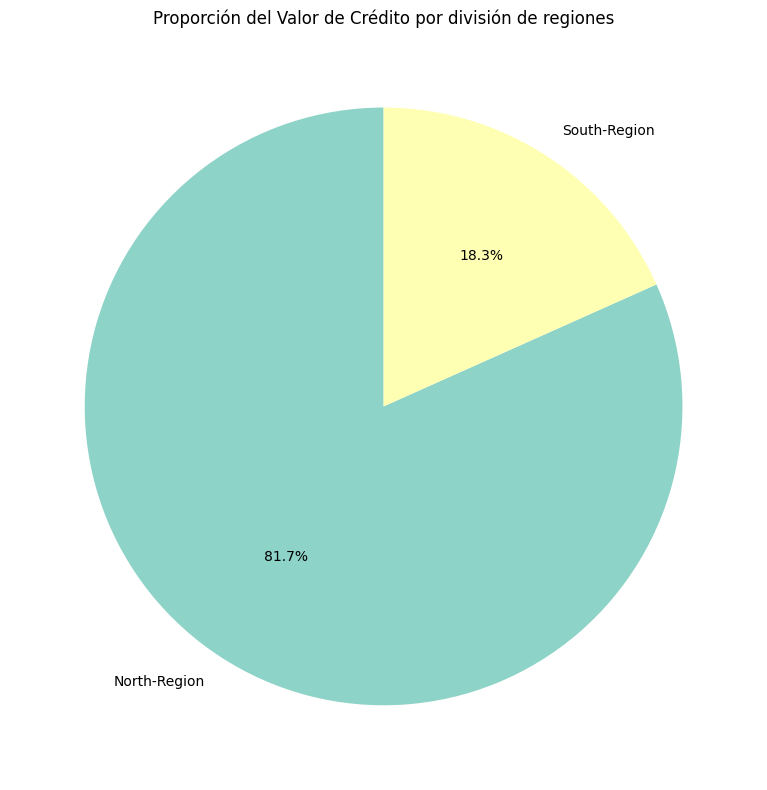

In [318]:
# Agrupar

division_sum = data_cleaned.groupby('DIVISION')['RELEASED_CREDIT_VALUE'].sum()

# Graficar

plt.figure(figsize=(8,8))
plt.pie(
    division_sum,
    labels=division_sum.index,
    autopct=lambda p: f'{p:.1f}%',
    startangle=90,
    colors=plt.cm.Set3.colors
)
plt.title('Proporción del Valor de Crédito por división de regiones')
plt.tight_layout()
plt.show()

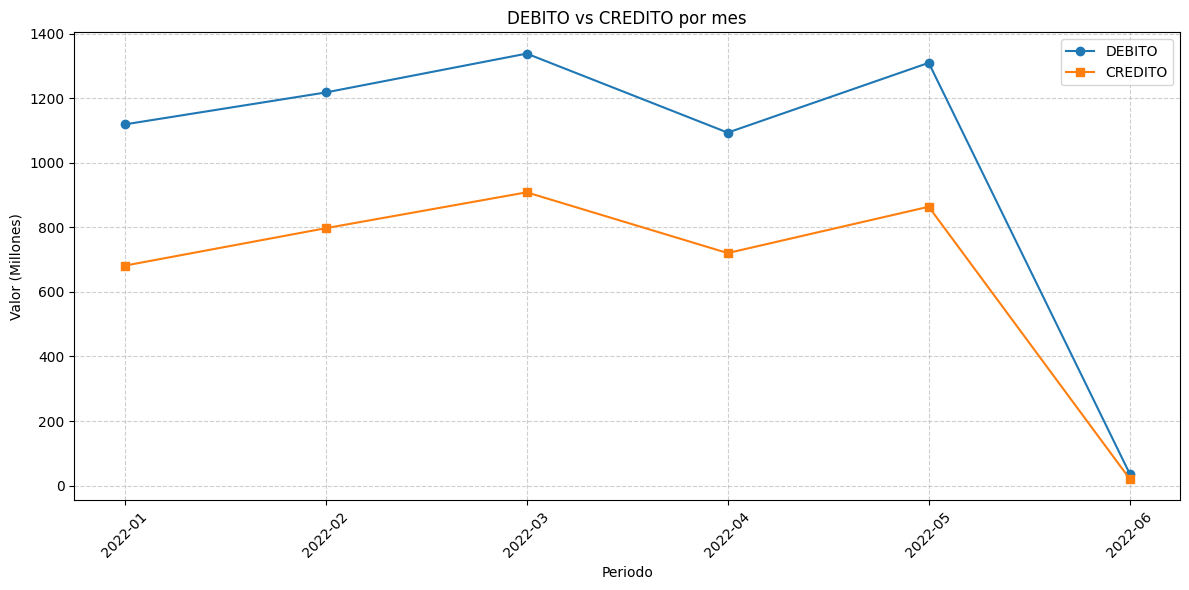

In [319]:
# Agrupar

monthly_sum = data_cleaned.groupby(['YEAR','MONTH'])[['ORDER_AMOUNT','RELEASED_CREDIT_VALUE']].sum().reset_index()

# Crear columna periodo

monthly_sum['PERIOD'] = monthly_sum['YEAR'].astype(str) + '-' + monthly_sum['MONTH'].astype(str).str.zfill(2)

# Graficar

plt.figure(figsize=(12,6))
plt.plot(monthly_sum['PERIOD'], monthly_sum['ORDER_AMOUNT']/1e6, marker='o', label='DEBITO')
plt.plot(monthly_sum['PERIOD'], monthly_sum['RELEASED_CREDIT_VALUE']/1e6, marker='s', label='CREDITO')

plt.title('DEBITO vs CREDITO por mes')
plt.xlabel('Periodo')
plt.ylabel('Valor (Millones)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()